In [11]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import adjustText
from adjustText import adjust_text

#Upload from CSVs
prof_adv_path = "prof_adv_2023_all.csv"
dist_attend_path = "District Proportional Attendance Rates.csv"
fr_rates_path = "FRLUNCH.csv"
fr_all_path = "FRALL.csv"
dist_count_path = "district_counties.csv"

#Read data and results
prof_adv_df = pd.read_csv(prof_adv_path)
fr_all_df = pd.read_csv(fr_all_path)
dist_count_df = pd.read_csv(dist_count_path)
att_all_df = pd.read_csv(dist_attend_path)

prof_adv_df.head(50)



,YEAR,SUMMARY_LEVEL,CATEGORY,TYPE,COUNTY_DISTRICT,DISTRICT_NAME,SCHOOL_CODE,SCHOOL_NAME,CONTENT_AREA,GRADE_LEVEL,...,LEVEL_NOT_DETERMINED,BELOW_BASIC,BASIC,PROFICIENT,ADVANCED,LEVEL_NOT_DETERMINED_PCT,BELOW_BASIC_PCT,BASIC_PCT,PROFICIENT_PCT,ADVANCED_PCT
0,2023,District,MSIP Race/Ethnicity,White (not Hispanic),1090,ADAIR CO. R-I,0,NaN,Eng. Language Arts,,...,*,21,49,28,11,*,19.3,45,25.7,10.1
1,2023,District,MSIP Race/Ethnicity,White (not Hispanic),1090,ADAIR CO. R-I,0,NaN,Mathematics,,...,*,41,39,18,14,*,36.6,34.8,16.1,12.5
2,2023,District,MSIP Race/Ethnicity,White (not Hispanic),1090,ADAIR CO. R-I,0,NaN,Science,,...,*,15,25,*,*,*,26.8,44.6,*,*
3,2023,District,MSIP Race/Ethnicity,White (not Hispanic),1090,ADAIR CO. R-I,0,NaN,Social Studies,,...,*,*,8,*,*,*,*,61.5,*,*
4,2023,District,MSIP Special Programs,IEP Students,1090,ADAIR CO. R-I,0,NaN,Eng. Language Arts,,...,*,10,*,*,*,*,66.7,*,*,*
5,2023,District,MSIP Special Programs,IEP Students,1090,ADAIR CO. R-I,0,NaN,Mathematics,,...,*,13,*,*,*,*,86.7,*,*,*
6,2023,District,MSIP Special Programs,MAP Direct Certification,1090,ADAIR CO. R-I,0,NaN,Eng. Language Arts,,...,*,8,13,5,6,*,25,40.6,15.6,18.8
7,2023,District,MSIP Special Programs,MAP Direct Certification,1090,ADAIR CO. R-I,0,NaN,Mathematics,,...,*,16,7,*,*,*,50,21.9,*,*
8,2023,District,MSIP Special Programs,MAP Direct Certification,1090,ADAIR CO. R-I,0,NaN,Science,,...,*,*,5,*,*,*,*,33.3,*,*
9,2023,District,MSIP Special Programs,MAP Free and Reduced Lunch,1090,ADAIR CO. R-I,0,NaN,Eng. Language Arts,,...,*,16,36,22,9,*,19.3,43.4,26.5,10.8


In [41]:
#Filter Attendance  by 2023
att_all_2023_df = att_all_df.loc[(att_all_df["YEAR"]==2023)]

#Reduced columns

att_all_2023_df = att_all_2023_df[["YEAR", "DISTRICT_NAME", "PROPORTIONAL_ATTENDANCE_TOTAL_PCT"]]

#Rename columns
att_all_2023_df = att_all_2023_df.rename(columns={"DISTRICT_NAME":"District Name"})
att_all_2023_df.head()

,YEAR,District Name,PROPORTIONAL_ATTENDANCE_TOTAL_PCT
14,2023,ADAIR CO. R-I,83.9
29,2023,KIRKSVILLE R-III,75.7
44,2023,ADAIR CO. R-II,87.8
59,2023,NORTH ANDREW CO. R-VI,86.9
74,2023,AVENUE CITY R-IX,92.3


In [57]:
#Clean data by replacing values
att_all_2023_df = att_all_2023_df[att_all_2023_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"]!="*"]

att_all_2023_df.count()

YEAR                                 557
District Name                        557
PROPORTIONAL_ATTENDANCE_TOTAL_PCT    557
dtype: int64

In [72]:
#Reduce prof/adv

prof_adv_math_df = prof_adv_df.loc[(prof_adv_df["TYPE"]=="Total")\
                                  & (prof_adv_df["CONTENT_AREA"]=="Mathematics")]

prof_adv_math_df = prof_adv_math_df.rename(columns={"DISTRICT_NAME": "District Name"})

prof_adv_math_df = prof_adv_math_df[["YEAR", "District Name", "PROFICIENT_PCT", "ADVANCED_PCT"]]

#Replace Null Values
prof_adv_math_df = prof_adv_math_df.replace(to_replace=["*"], value=0.0)

#Change data types
prof_adv_new_df = prof_adv_math_df.astype({"PROFICIENT_PCT":"float64"})
prof_adv_new_df = prof_adv_new_df.astype({"ADVANCED_PCT":"float64"})

#Add Totals Prof/Adv
total_pct = []
for index, row in prof_adv_new_df.iterrows():
     total_pct.append((row["PROFICIENT_PCT"]+row["ADVANCED_PCT"]))
    
prof_adv_new_df["TOTAL_PCT"] = total_pct

#Drop 0.0 values
prof_adv_new_df=prof_adv_new_df.drop(prof_adv_new_df[prof_adv_new_df["TOTAL_PCT"]==0.0].index)

prof_adv_new_df.head()

,YEAR,District Name,PROFICIENT_PCT,ADVANCED_PCT,TOTAL_PCT
17,2023,ADAIR CO. R-I,16.1,12.5,28.6
61,2023,KIRKSVILLE R-III,22.6,21.6,44.2
76,2023,ADAIR CO. R-II,31.3,0.0,31.3
99,2023,NORTH ANDREW CO. R-VI,32.5,29.9,62.4
119,2023,AVENUE CITY R-IX,36.9,29.2,66.1


In [73]:
#Merge two data frames
merged_df = pd.merge(att_all_2023_df, prof_adv_new_df, how="inner", on=["District Name"])

#Reduce Columns
merged_2_df = merged_df[["District Name", "PROPORTIONAL_ATTENDANCE_TOTAL_PCT", "TOTAL_PCT"]]

#Change all to float
merged_2_df = merged_2_df.astype({"PROPORTIONAL_ATTENDANCE_TOTAL_PCT":"float64"})
merged_2_df.dtypes

District Name                         object
PROPORTIONAL_ATTENDANCE_TOTAL_PCT    float64
TOTAL_PCT                            float64
dtype: object

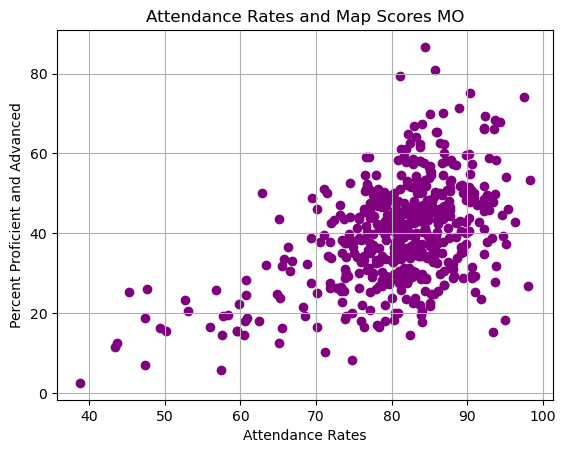

In [79]:
#Plot

x = merged_2_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"]
y = merged_2_df["TOTAL_PCT"]

plt.scatter(x,y, color="purple")
plt.xlabel("Attendance Rates")
plt.ylabel("Percent Proficient and Advanced")
plt.title("Attendance Rates and Map Scores MO")
plt.grid()
plt.savefig("AttMAPAllMO")
plt.show()